In [68]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import ImageFont, ImageDraw, Image
import cv2 as cv

In [57]:
kernel = np.array([[0,0,0],
                  [1,0,-1],
                  [0,0,0]])
img = np.array([[1,2,3],
                  [200,5,200],
                  [7,8,9]],
               dtype='float')
filtered = cv.filter2D(img,-1,kernel)
print(filtered)

[[ 0. -2.  0.]
 [ 0.  0.  0.]
 [ 0. -2.  0.]]


In [33]:
"""
54565
21232
54565
87898
54565
"""

'\n54565\n21232\n54565\n87898\n54565\n'

In [60]:
cv.imwrite('output.png',filtered.astype('uint8'))

img1 = cv.imread("output.png")
print(img1)

[[[  0   0   0]
  [254 254 254]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [254 254 254]
  [  0   0   0]]]


In [54]:
ma = np.max(filtered)
mm = np.min(filtered)
n =( filtered - mm )/( ma - mm )*255 # -2 ~ 0 -> 0 ~ 255 
print(n)
n2 =np.abs(filtered)/np.max(np.abs(filtered))*255 # 0 ~ 2 -> 0 ~ 255 음수의 값들을 필요할때 절대값으로 표현
print(n2)
# print(np.ptp(filtered))
norm = cv.normalize(filtered,None,0,255,cv.NORM_MINMAX).astype('uint8')
print(norm)

[[255.   0. 255.]
 [255. 255. 255.]
 [255.   0. 255.]]
[[  0. 255.   0.]
 [  0.   0.   0.]
 [  0. 255.   0.]]
[[255   0 255]
 [255 255 255]
 [255   0 255]]


In [82]:
src = cv.imread("Lena.png",cv.IMREAD_GRAYSCALE)
src2 = src.astype('float')

embossing = np.array([[0,+1,0],
                  [0,0,0],
                  [0,-1,0]])
filtered = cv.filter2D(src,-1,embossing)
filtered2 = cv.filter2D(src,-1,embossing) +128
print(np.min(filtered2))
print(np.max(filtered2))
cv.imwrite('output3.png',filtered2)

norm = cv.normalize(filtered,None,0,255,cv.NORM_MINMAX).astype('uint8')
print(np.min(norm))
print(np.max(norm))
cv.imwrite('output4.png',norm)

0
255
0
255


True

In [84]:
src = cv.imread('shape.png', cv.IMREAD_GRAYSCALE)
src2 = src.astype('int16')

kernel = np.array([[0,+1,0],
                   [0,0,0],
                   [0,-1,0]
                  ])
filtered = cv.filter2D(src2, -1, kernel) + 128

filtered2 = cv.filter2D(src2, -1, kernel)
filtered2 = cv.normalize(filtered2, None , 0, 255, cv.NORM_MINMAX)

print(np.min(filtered))
print(np.max(filtered))
print(np.min(filtered2))
print(np.max(filtered2))


cv.imwrite("output.png", filtered)
cv.imwrite("output2.png", filtered2)

5
290
0
255


True

In [101]:
src = cv.imread('polygon.png', cv.IMREAD_GRAYSCALE)
src2 = src.astype('int16')

kernel = np.array([[-1,0,-1],
                   [0,4,0],
                    [-1,0,-1]
                  ])/4

filtered2 = cv.filter2D(src2, -1, kernel)
# filtered2 = cv.normalize(filtered2, None , 0, 255, cv.NORM_MINMAX)

print(np.min(filtered2))
print(np.max(filtered2))

# plt.imshow(filtered2,cmap='gray')
cv.imwrite("polygon1.png", filtered2)


-191
255


True

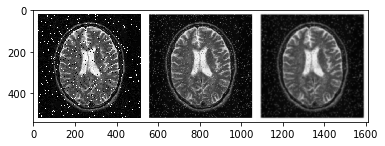

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


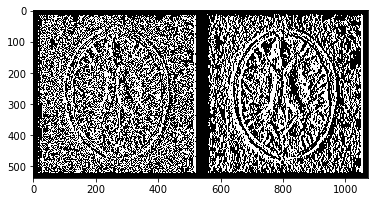

In [109]:
image = cv.imread('brain.jpeg')
gauss = cv.GaussianBlur(image,(7,7),0)
gauss2 = cv.GaussianBlur(image,(15,15),0) #평균 /고주파 성분 날려 Blur처리 됨
plt.imshow(np.hstack([image,gauss,gauss2]))
plt.show()
out1 = cv.Sobel(image,cv.CV_64F,1,0,ksize=3)
out2 = cv.Sobel(gauss,cv.CV_64F,1,0,ksize=3)
plt.imshow(np.hstack([out1,out2]))
plt.show()

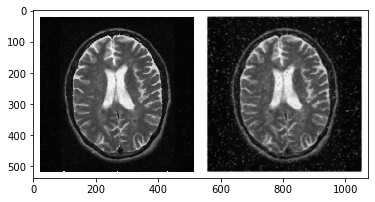

In [110]:
median1 = cv.medianBlur(image,5)
median2 = cv.medianBlur(gauss,5) #중앙값 / 가우시안보다 고주파 성분이 남음
plt.imshow(np.hstack([median1,median2]))
plt.show()